# MCMC on TOI4504, sectors 1- 13


In [2]:
# we want to see plots right here in the notebook
%matplotlib inline
import sys
sys.path.append('../../src/curvesimulator/')
from cs_flux_data import *
path = '../../research/star_systems/TOI-4504/lightkurve/'  # path to lightcurve data


In [ ]:
t0 = 2458400
df = csv2df(path+"01-13_p.csv")
plot_this(df.time, [df.flux], title="All processed TOI-4504 flux")
df

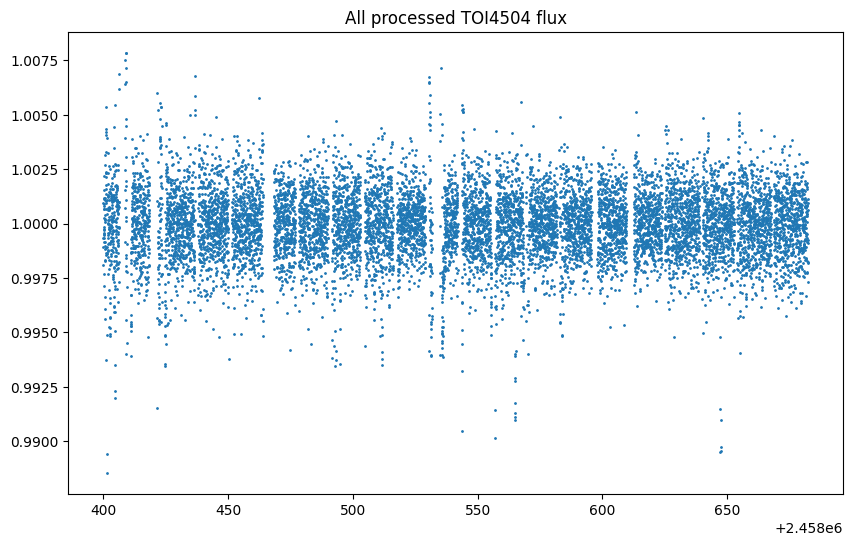

,time,flux,flux_err
0,2.458400e+06,0.999320,0.001761
1,2.458400e+06,0.998904,0.001772
2,2.458400e+06,1.000942,0.001778
3,2.458400e+06,0.998075,0.001810
4,2.458400e+06,0.999713,0.001822
...,...,...,...
11363,2.458682e+06,1.000955,0.001496
11364,2.458682e+06,0.999097,0.001496
11365,2.458682e+06,0.997335,0.001496
11366,2.458682e+06,1.000628,0.001496


In [4]:
df = df[df['time'] >= t0].reset_index(drop=True)  # remove rows from df where df['time'] is less than t0
plot_this(df.time, [df.flux], title="All processed TOI-4504 flux")
df
# df2csv(df, path + "01t0-13_p.csv")


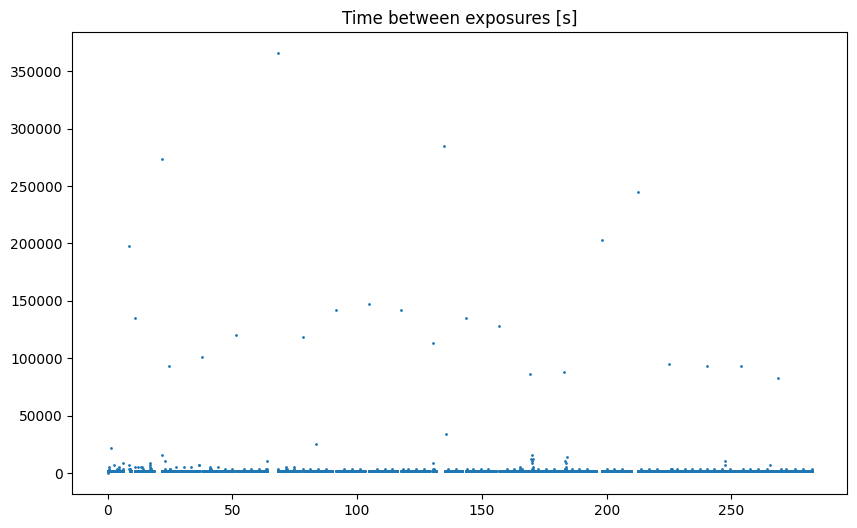

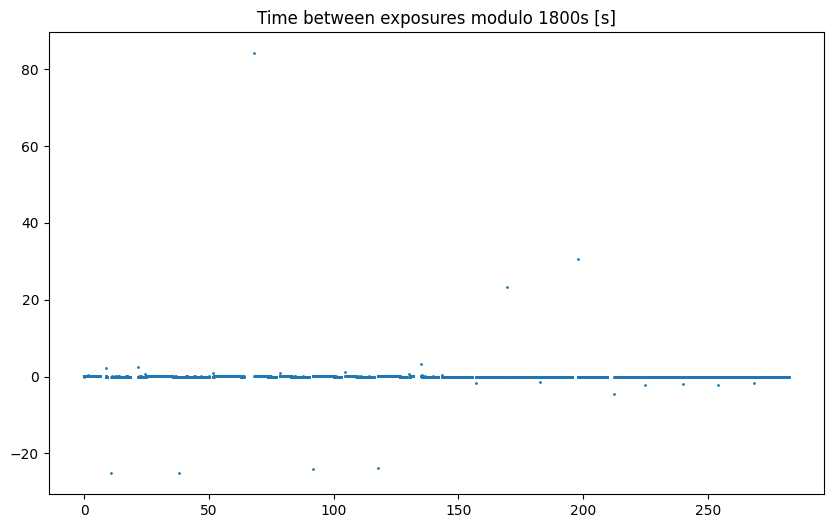

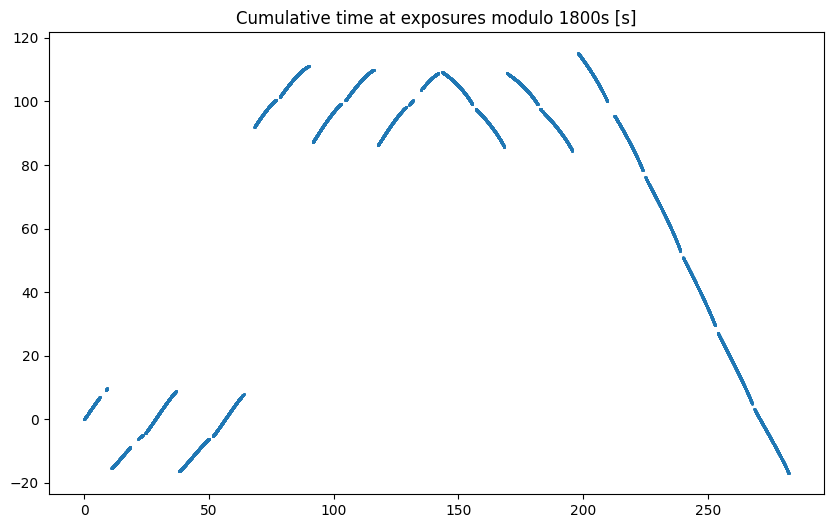

In [5]:
# Add a column exposure to df, where df.exposure[0] = 0 and else df.exposure[i] = df.time[i] - df.time[i-1]
# Python
# Add a column 'exposure' to df
df['time'] -= t0
df['exposure'] = [0] + [(df.time[i] - df.time[i-1]) * 24 * 60 * 60 for i in range(1, len(df.time))]
df['exp_mod'] = df.exposure % 1800
df['exp_mod'] = df['exp_mod'].apply(lambda x: x - 1800 if x > 900 else x)
df['exp_kum'] = (df.time - df.time[0]) * 24 * 60 * 60
df['exp_kum_mod'] = df.exp_kum % 1800
df['exp_kum_mod'] = df['exp_kum_mod'].apply(lambda x: x - 1800 if x > 900 else x)

plot_this(df.time, [df.exposure], title="Time between exposures [s]")
plot_this(df.time, [df.exp_mod], title="Time between exposures modulo 1800s [s]")
plot_this(df.time, [df.exp_kum_mod], title="Cumulative time at exposures modulo 1800s [s]")
